In [1]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.no_of_iterations=0

In [2]:
def dis(z,c):
    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sum

In [3]:
def assign_cluster_label(data, centers):
    cluster_labels = []
    for point in data:
        # compute distances between three cluster centers to a data point
        distances = [dis(point, center) for center in centers]
        # find which cluster is closest to the data point and assign the cluster  it
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

In [4]:
def gen_wolf(n_cluster,dim):
    graywolf=[]
    for j in range(n_cluster):
        c=[]
        for i in range(dim):
            ub=x[i].max()
            lb=x[i].min()
            c.append(np.random.uniform(0,1) *(ub-lb)+lb)
        graywolf.append(c)
    return np.array(graywolf)

In [5]:
def init_pop(n_pop,n_cluster,dim):
    init_pop=[]
    for i in range (n_pop):
        #index = np.random.choice(list(range(len(x))), 3)
        z=gen_wolf(n_cluster,dim)
        
        init_pop.append(np.array(z))
    return np.array(init_pop)

In [6]:
from math import sqrt
def dist_f(z,c):

    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sqrt(sum)

In [7]:
def fitness(data,Positions,current_labels,i):
    #fitnesses=[]
    
    #for i in range(len(gw)):
        
    bank=0
    for j in range(len(Positions[i])):
        for k in range(len(current_labels)):
                
            if current_labels[k]==j:
                bank =bank + dist_f(data[k],Positions[i][j])
        #fitnesses.append(bank)
        
    return bank

In [8]:
import pandas as pd

df = pd.read_csv('glass.data')
points = df.values

In [9]:
points

array([[  2.     ,   1.51761,  13.89   , ...,   0.     ,   0.     ,
          1.     ],
       [  3.     ,   1.51618,  13.53   , ...,   0.     ,   0.     ,
          1.     ],
       [  4.     ,   1.51766,  13.21   , ...,   0.     ,   0.     ,
          1.     ],
       ...,
       [212.     ,   1.52065,  14.36   , ...,   1.64   ,   0.     ,
          7.     ],
       [213.     ,   1.51651,  14.38   , ...,   1.57   ,   0.     ,
          7.     ],
       [214.     ,   1.51711,  14.23   , ...,   1.67   ,   0.     ,
          7.     ]])

In [10]:
seeds=pd.DataFrame(points)

In [11]:
x=points[:,0:10]

In [12]:
x=pd.DataFrame(x)

In [13]:
x

,0,1,2,3,4,5,6,7,8,9
0,2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6.0,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
208,210.0,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [14]:
import random
import numpy
import math
#from solution import solution
import time


    

def GWO(Max_iter,SearchAgents_no,n_cluster,dim):
    
   
    ggnn=0
    data=np.array(x)

    levy=np.zeros(SearchAgents_no)
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros((n_cluster,dim))
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros((n_cluster,dim))
    Beta_score=float("inf")
    
    Delta_pos=np.zeros((n_cluster,dim))
    Delta_score=float("inf")
    
    #Initialize the positions of search agents
    Positions=init_pop(SearchAgents_no,n_cluster,dim)
    
    Convergence_curve=numpy.zeros(Max_iter)
    sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    
    
    #sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    #timerStart=time.time() 
    #sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            #Positions[i,:]=numpy.clip(Positions[i,:], lb, ub)

            # Calculate objective function for each search agent
            
            current_centers=pd.DataFrame(Positions[i])
            current_labels = assign_cluster_label(data,Positions[i])
            current_centers.columns=['x','y','z','k','e','p','o','a','b','n']
            fitness1=fitness(data,Positions,current_labels,i)
            
            # Update Alpha, Beta, and Delta
            if fitness1<Alpha_score :
                Alpha_score=fitness1; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1<Beta_score ):
                Beta_score=fitness1  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1>Beta_score and fitness1<Delta_score): 
                Delta_score=fitness1 # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        #z=numpy.random.uniform()
        #z=4*z*(1-z)
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        beta=0.5
        sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta);
        
        for i in range(0,SearchAgents_no):
            for j in range (0,n_cluster):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
            
            s=Positions[i,:]
            
            u=numpy.random.uniform(size=dim)*sigma
            v=numpy.random.uniform(size=dim)
            step=u*abs(v)**(1/beta)
            stepsize=0.1*step*(s-Alpha_pos) #s-alpha_pos
            s=s+stepsize*numpy.random.uniform(size=dim)
            Positions[i]=s
        Convergence_curve[l]=Alpha_score

    timerEnd=time.time()  
    sol.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    sol.executionTime=timerEnd-timerStart
    sol.convergence=Convergence_curve
    sol.optimizer="GWO"
    
    sol.no_of_iterations=l
    
    
    
    
    print(Alpha_pos)
    return Alpha_pos,current_labels,sol

In [15]:
import numpy as np

In [16]:
egwo=GWO(Max_iter=100,SearchAgents_no=10,n_cluster=6,dim=10)

[[1.04544596e+02 1.57308741e+00 1.28191398e+01 2.95261257e+00
  1.50720491e+00 7.58655880e+01 5.40943000e+00 1.18566059e+01
  8.42524527e-01 8.11443069e-02]
 [8.45709528e+01 1.34370794e+00 1.45527792e+01 1.87987512e+00
  1.17745449e+00 6.38188613e+01 2.56284948e+00 8.54732630e+00
  1.13608282e+00 6.25891397e-02]
 [1.48054855e+02 1.39035483e+00 1.19626688e+01 1.74714053e+00
  1.51512788e+00 6.57994431e+01 2.43479265e+00 9.61363315e+00
  1.25497126e+00 4.36083440e-02]
 [1.71728163e+02 1.56006102e+00 1.59847617e+01 6.06337089e-01
  8.33586585e-01 7.48483450e+01 1.18839563e+00 1.34729312e+01
  1.73692630e+00 1.77991430e-01]
 [2.00513220e+02 1.51647848e+00 1.35644108e+01 3.32431338e+00
  1.61331291e+00 7.12671183e+01 3.25971039e+00 1.20481044e+01
  2.67486570e+00 3.37294097e-01]
 [2.16566949e+01 1.51835018e+00 1.24174504e+01 1.35489130e+00
  1.31875987e+00 7.20960023e+01 2.29056186e+00 1.41332682e+01
  1.12299541e+00 1.78026064e-01]]


In [17]:
current_centers=pd.DataFrame(egwo[0])

In [18]:
current_centers.columns=['x','y','z','k','e','p','o','a','b','n']

In [19]:
current_labels=egwo[1]

In [20]:
data=np.array(x)
data_df = pd.DataFrame(data)
data_df.columns=['x','y','z','k','e','p','o','a','b','n']

In [21]:
data_df

,x,y,z,k,e,p,o,a,b,n
0,2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6.0,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
208,210.0,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [25]:
x1=[]
for i in range(100):
    x1.append(i)

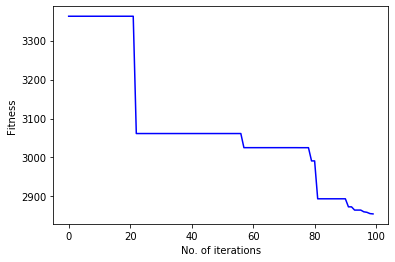

In [26]:
plt.plot(x1,egwo[2].convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("enhanced_F1.png")
plt.show()